In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = "collated.csv"  
df = pd.read_csv(file_path)

In [63]:
print("First 20 rows of the dataset:")
display(df.head(20))

First 20 rows of the dataset:


,Label,No of Samples,Average_Resp_Time,Min_Resp_Time,Max_Resp_Time,Std. Dev.,Error %,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes
0,Login,1,668,668,668,0.00,0.0,1.49701,4.93,0.53,3373.0
1,Airtime,1,6946,6946,6946,0.00,0.0,0.14397,0.10,0.39,706.0
2,Customer-Loan-Information,1,920,920,920,0.00,0.0,1.08696,1.91,2.31,1797.0
3,Login,2,387,194,581,193.50,0.0,2.88600,9.48,1.02,3363.0
4,Airtime,2,7088,6686,7491,402.50,0.0,0.26699,0.18,0.72,706.0
5,Customer-Loan-Information,2,819,778,861,41.50,0.0,1.27389,2.24,2.71,1797.0
6,Login,3,937,868,1044,76.55,0.0,1.95822,6.44,0.69,3366.3
7,Airtime,3,10929,10551,11250,288.33,0.0,0.25578,0.18,0.69,706.0
8,Customer-Loan-Information,3,1138,1013,1227,91.27,0.0,1.36924,2.40,2.91,1797.0
9,Login,4,926,895,953,24.11,0.0,2.35988,7.74,0.84,3358.0


In [12]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,No of Samples,Average_Resp_Time,Min_Resp_Time,Max_Resp_Time,Std. Dev.,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,29.900000,6948.916667,4051.816667,10576.816667,1724.614167,4.418715,12.755167,3.364167,1942.056667
std,32.610022,7754.402803,4328.209774,12225.269962,2680.189485,6.973200,23.665956,2.527545,1107.594593
min,1.000000,387.000000,94.000000,581.000000,0.000000,0.143970,0.100000,0.390000,705.700000
25%,4.750000,935.000000,773.750000,1278.250000,141.720000,0.934132,0.925000,1.235000,706.000000
50%,9.500000,2789.500000,1044.500000,4797.500000,280.285000,1.797810,2.665000,2.950000,1797.000000
75%,52.500000,11040.250000,8293.000000,15140.000000,1811.190000,3.352295,10.090000,4.912500,3366.850000
max,100.000000,27416.000000,13954.000000,52082.000000,10348.300000,31.708280,104.320000,11.240000,3373.000000


In [13]:
print("\nUnique Labels and their Counts:")
display(df['Label'].value_counts())


Unique Labels and their Counts:


Label
Login                        20
Airtime                      20
Customer-Loan-Information    20
Name: count, dtype: int64

In [14]:

df['Error %'] = df['Error %'].str.replace('%', '', regex=True).astype(float)



In [15]:
# Error % Analysis...mean error
error_avg = df['Error %'].mean()
print(f"\nAverage Error Percentage: {error_avg:.2f}%")



Average Error Percentage: 0.90%


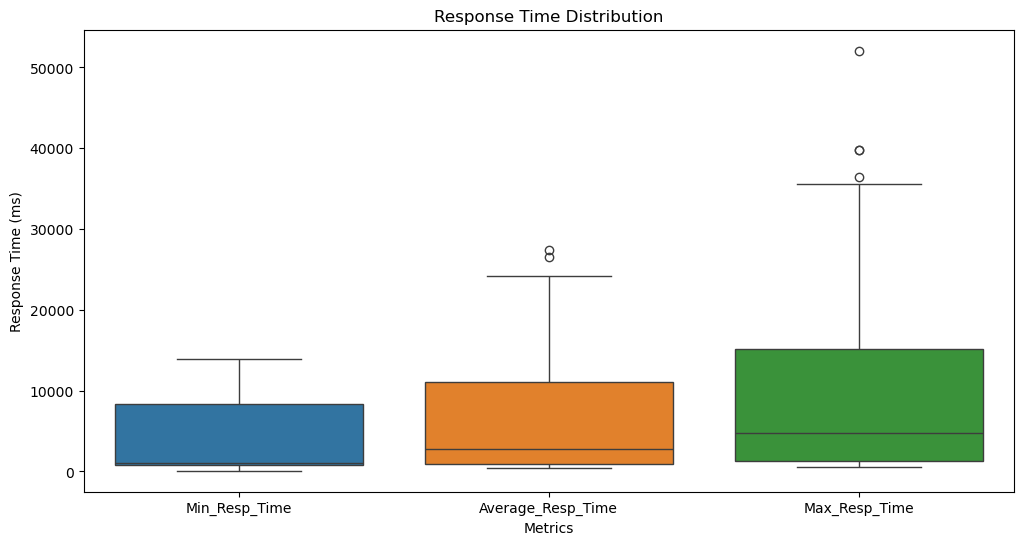

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Min_Resp_Time', 'Average_Resp_Time', 'Max_Resp_Time']])
plt.title("Response Time Distribution")
plt.ylabel("Response Time (ms)")
plt.xlabel("Metrics")
plt.show()

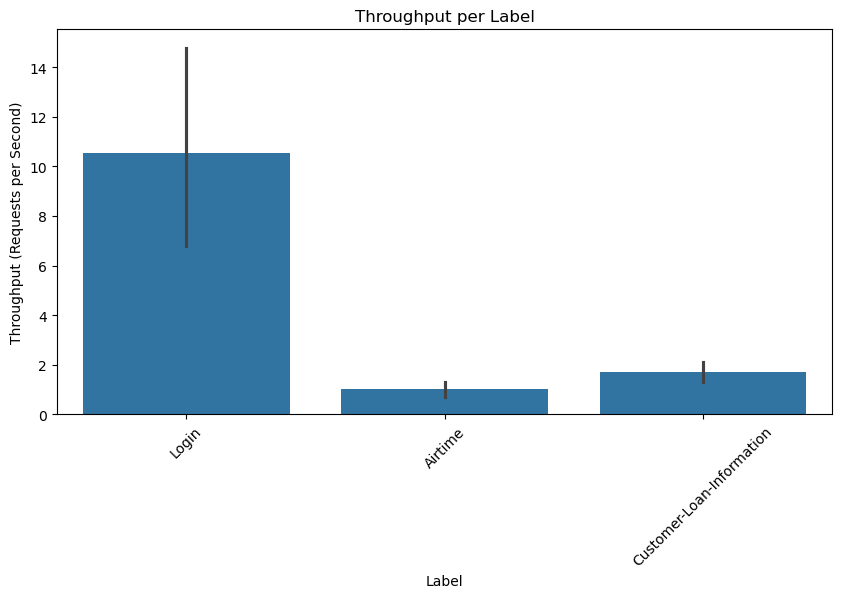

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Label"], y=df["Throughput"])
plt.xticks(rotation=45)
plt.title("Throughput per Label")
plt.ylabel("Throughput (Requests per Second)")
plt.xlabel("Label")
plt.show()

In [18]:
# Insights and Inferences
print("\n🔍 **Key Insights:**")
print(f"- The highest average response time is {df['Average_Resp_Time'].max()} ms.")
print(f"- The lowest recorded response time is {df['Min_Resp_Time'].min()} ms.")
print(f"- The average throughput across all labels is {df['Throughput'].mean():.2f} requests/sec.")
print(f"- The error rate is generally low ({error_avg:.2f}%) but should be monitored.")



🔍 **Key Insights:**
- The highest average response time is 27416 ms.
- The lowest recorded response time is 94 ms.
- The average throughput across all labels is 4.42 requests/sec.
- The error rate is generally low (0.90%) but should be monitored.


In [66]:
%%html

<style>
    .red{
    background-color: #cf5140;
        color: #ffffff
    }
</style>

<div class="red"> <b>
    ERROR RATE ANALYSIS </b>
</div>

In [20]:
df['Error %'] = df['Error %'].astype(str).str.replace('%', '').astype(float)

# Count samples with 0% error
zero_error_samples = df[df['Error %'] == 0].shape[0]

# Count total samples
total_samples = df.shape[0]

In [21]:
print(f"Total samples: {total_samples}")
print(f"Samples with 0% error: {zero_error_samples}")


Total samples: 60
Samples with 0% error: 58


In [22]:
sample_sizes = range(1, total_samples+1)
error_rates = [(df.iloc[:i]['Error %'].mean()) for i in sample_sizes]


In [23]:
min_zero_error_samples = next((i for i, rate in enumerate(error_rates) if rate == 0.00), None)


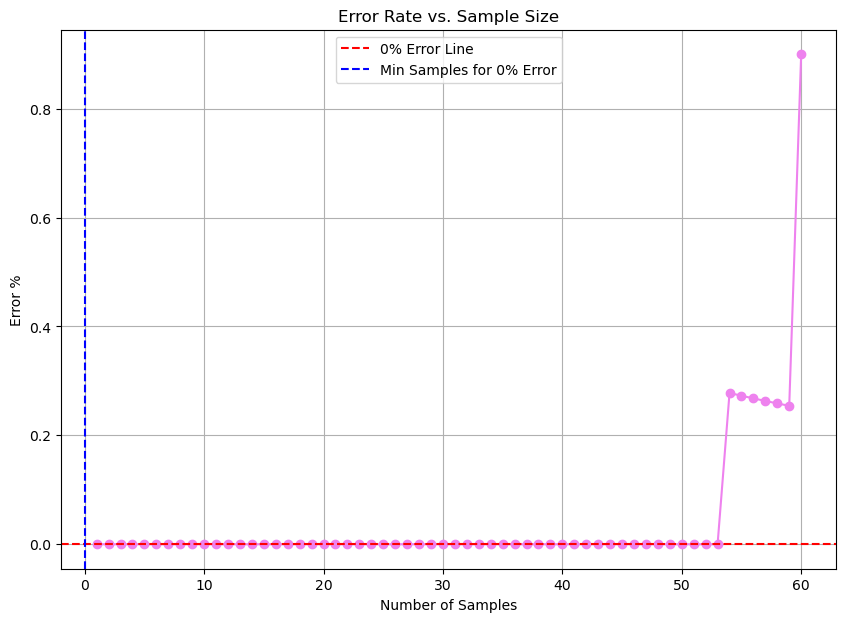

In [79]:
plt.figure(figsize=(10, 7))
plt.plot(sample_sizes, error_rates, marker='o', linestyle='-', color='violet')
plt.axhline(y=0, color='r', linestyle='--', label="0% Error Line")
plt.axvline(x=min_zero_error_samples, color='b', linestyle='--', label="Min Samples for 0% Error")
plt.xlabel("Number of Samples")
plt.ylabel("Error %")
plt.title("Error Rate vs. Sample Size")
plt.legend()
plt.grid(True)
plt.show()


# OUTLIERS

In [26]:
Q1 = df['Error %'].quantile(0.25)
Q3 = df['Error %'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['Error %'] < lower_bound) | (df['Error %'] > upper_bound)]


In [27]:
print(f"Total Outliers Found: {outliers.shape[0]}")
print(outliers)

Total Outliers Found: 2
                        Label  No of Samples  Average_Resp_Time  \
53  Customer-Loan-Information             80                929   
59  Customer-Loan-Information            100                726   

    Min_Resp_Time  Max_Resp_Time  Std. Dev.  Error %  Throughput  \
53            114           1564     292.41     15.0     2.52797   
59             94          12492    1231.85     39.0     1.75954   

    Received KB/sec  Sent KB/sec  Avg. Bytes  
53             3.82         5.38      1548.5  
59             1.98         3.74      1150.8  


Instead of just answering "How many samples lead to 0% error?", I would ask:

"At what sample size does accuracy stabilize?"
"Are there any hidden anomalies affecting error rates?"

e.g. The sample with 5% error has a high throughput (6.55/sec).
If high-throughput samples consistently have low error, it may suggest biased data

# THROUGHPUT VS ERROR

In [85]:
low_error_outliers = outliers[outliers['Error %'] > 0.0]  # Adjust threshold if needed
print(low_error_outliers.describe())


       No of Samples  Average_Resp_Time  Min_Resp_Time  Max_Resp_Time  \
count       2.000000           2.000000       2.000000       2.000000   
mean       90.000000         827.500000     104.000000    7028.000000   
std        14.142136         143.542677      14.142136    7727.262905   
min        80.000000         726.000000      94.000000    1564.000000   
25%        85.000000         776.750000      99.000000    4296.000000   
50%        90.000000         827.500000     104.000000    7028.000000   
75%        95.000000         878.250000     109.000000    9760.000000   
max       100.000000         929.000000     114.000000   12492.000000   

         Std. Dev.    Error %  Throughput  Received KB/sec  Sent KB/sec  \
count     2.000000   2.000000    2.000000         2.000000     2.000000   
mean    762.130000  27.000000    2.143755         2.900000     4.560000   
std     664.284395  16.970563    0.543362         1.301076     1.159655   
min     292.410000  15.000000    1.759540 

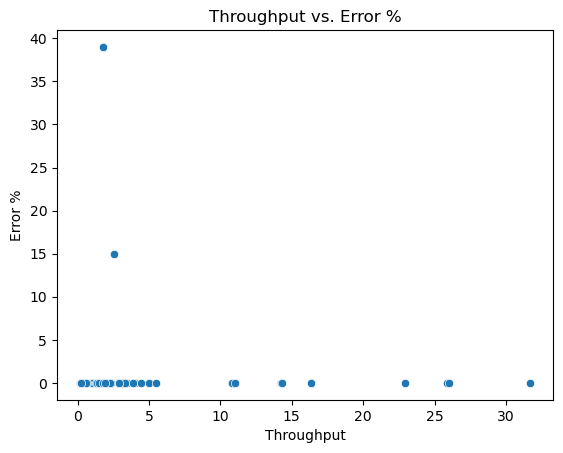

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="Throughput", y="Error %")
plt.title("Throughput vs. Error %")
plt.show()


In [33]:
print(outliers['Label'].value_counts())


Label
Customer-Loan-Information    2
Name: count, dtype: int64


This suggests that higher throughput might be correlated with more stable system performance.
For example, A cloud-based system with auto-scaling might be unstable at low loads but becomes more stable
at higher loads when resource allocation is optimal.

# UPDATED FILE WITH THROUGHPUT_DATA COLUMN

In [29]:
import pandas as pd

file_path = "collated.csv" 
df = pd.read_csv(file_path)

required_columns = {"Received KB/sec", "Sent KB/sec", "Avg. Bytes"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing columns in CSV: {required_columns - set(df.columns)}")

df["Avg. Bytes"] = df["Avg. Bytes"] / 1000  # b to kb

df["data_throughput_tps"] = (df["Received KB/sec"] + df["Sent KB/sec"]) / df["Avg. Bytes"]

# Save the updated DataFrame back to CSV
updated_file_path = "updated_" + file_path
df.to_csv(updated_file_path, index=False)

print(f"Updated CSV saved as: {updated_file_path}")


Updated CSV saved as: updated_collated.csv


In [31]:
file_path = "updated_collated.csv"  
df = pd.read_csv(file_path)

In [33]:
print("First 20 rows of the dataset:")
display(df.head(20))

First 20 rows of the dataset:


,Label,No of Samples,Average_Resp_Time,Min_Resp_Time,Max_Resp_Time,Std. Dev.,Error %,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes,data_throughput_tps
0,Login,1,668,668,668,0.00,0.000%,1.49701,4.93,0.53,3.3730,1.618737
1,Airtime,1,6946,6946,6946,0.00,0.000%,0.14397,0.10,0.39,0.7060,0.694051
2,Customer-Loan-Information,1,920,920,920,0.00,0.000%,1.08696,1.91,2.31,1.7970,2.348358
3,Login,2,387,194,581,193.50,0.000%,2.88600,9.48,1.02,3.3630,3.122212
4,Airtime,2,7088,6686,7491,402.50,0.000%,0.26699,0.18,0.72,0.7060,1.274788
5,Customer-Loan-Information,2,819,778,861,41.50,0.000%,1.27389,2.24,2.71,1.7970,2.754591
6,Login,3,937,868,1044,76.55,0.000%,1.95822,6.44,0.69,3.3663,2.118052
7,Airtime,3,10929,10551,11250,288.33,0.000%,0.25578,0.18,0.69,0.7060,1.232295
8,Customer-Loan-Information,3,1138,1013,1227,91.27,0.000%,1.36924,2.40,2.91,1.7970,2.954925
9,Login,4,926,895,953,24.11,0.000%,2.35988,7.74,0.84,3.3580,2.555092


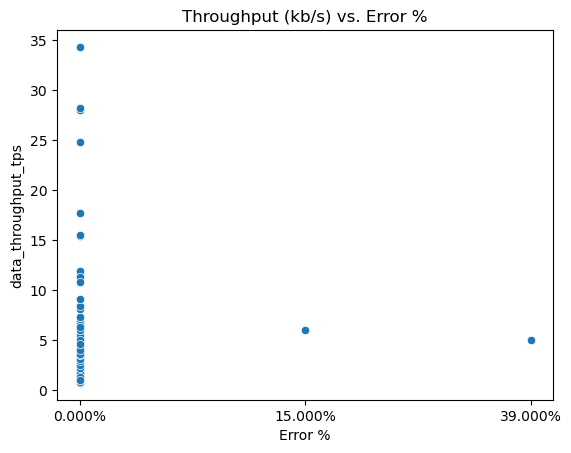

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, y="data_throughput_tps",x="Error %")
plt.title("Throughput (kb/s) vs. Error %")
plt.show()


In [41]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,No of Samples,Average_Resp_Time,Min_Resp_Time,Max_Resp_Time,Std. Dev.,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes,data_throughput_tps
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,29.900000,6948.916667,4051.816667,10576.816667,1724.614167,4.418715,12.755167,3.364167,1.942057,6.673752
std,32.610022,7754.402803,4328.209774,12225.269962,2680.189485,6.973200,23.665956,2.527545,1.107595,7.128405
min,1.000000,387.000000,94.000000,581.000000,0.000000,0.143970,0.100000,0.390000,0.705700,0.694051
25%,4.750000,935.000000,773.750000,1278.250000,141.720000,0.934132,0.925000,1.235000,0.706000,2.546631
50%,9.500000,2789.500000,1044.500000,4797.500000,280.285000,1.797810,2.665000,2.950000,1.797000,4.164806
75%,52.500000,11040.250000,8293.000000,15140.000000,1811.190000,3.352295,10.090000,4.912500,3.366850,7.478754
max,100.000000,27416.000000,13954.000000,52082.000000,10348.300000,31.708280,104.320000,11.240000,3.373000,34.300980
